# Parte II prueba técnica

#### *David Alcántara*

# Introducción

### Contexto

El auditor Senior en conjunto con el equipo de investigación, ha construido un conjunto de datos de movimientos de tarjetas de créditos donde está marcada cuales transacciones han sido legítimas y cuáles han sido fraudulentas. Este set de datos es muy valioso porque ya contiene 29 variables que explican cuando la transacción es legítima y cuando es fraudulenta.

Así, el objetivo de este trabajo es construir un modelo de aprendizaje automático que permita para nuevas transacciones identificar si es legítima o fraudulenta. Basándose en los datos extraídos del archivo "creditcard_sampledata_2.csv", este breve proyecto contiene un análisis tanto descriptivo y exploratorio, como de selección de las variables más relevantes. Finalmente, se implementan varios modelos predictivos con el fin de clasificar los datos entregados en función de modelos que presentan diferentes tipos de resultados.

### Objetivo

**Predecir transacciones Fraudulentas de un conjunto determinado de datos.** 

### Librerías

A continuación se presetan todas las librerías y seteos iniciales que son necesarios para los procesos que se usarán a lo largo del documento.

In [1]:
## Importanto Librerías
# Genral
import pandas as pd
import numpy as np
import os
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html, display, HTML
# Statistics
from scipy.stats import shapiro, ttest_ind
# Sampling
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# General Machine Learning
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, ParameterGrid, 
    cross_val_score, KFold
)
from sklearn.metrics import confusion_matrix, classification_report
# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
# Warinings
import warnings

## Settings
%matplotlib inline
pd.options.display.max_colwidth = 10000
plt.rcParams['figure.figsize'] = [20, 12]
warnings.filterwarnings('ignore')

## Variables
# Archivos
DESKTOP_PATH: str = os.getcwd()
DATA_PATH: str = 'Data_Prueba/Parte_II'
FAILE_NAME: str = 'creditcard_sampledata_2.csv'
GLOBAL_PATH: str = f'{DESKTOP_PATH}/{DATA_PATH}/{FAILE_NAME}'
# Estadística
NORMAL_CUTOFF: float = 3 
PVALUE_CUTOFF: float = 0.05
MAX_CORR_VAL: float = 0.3
# Sampling
OVER_SAMPLING_PROPORTION: float = 0.3
UNDER_SAMPLING_PROPORTION: float = 0.3
# Machine Learning
RANDOM_STATE: int = 123456
TEST_SIZE: float = 0.2
MIN_ACCURRACY: float = 0.95
CROSS_VALIDATION_NUM = KFold(3)
MAX_ITERATIONS: int = 5000

In [2]:
%%html
<style> 
   table td, table th, table tr {text-align:center !important;}
</style>

### Datos

La siguiente tabla muestra los datos que serán utilizads a lo largo de este breve informe. Los datos de Entrenamiento serán usados para la construcción de los modelos y la exploración, mientras que los datos de Predicción sólo se usarán al final para generar el producto final de clasificación.

In [3]:
# Importando datos y Definiendo Variable Independiente
df = pd.read_csv(GLOBAL_PATH, index_col=0).reset_index(drop=True)
y_col = 'Class'
# Visualización de Resultados
display_html('<h2>Vista general Datos</h2>', raw=True)
display(df)

Vista general Datos

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,-0.334597,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,-0.029903,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,1.465259,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,-0.165442,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,0.484216,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,-3.593476,0.781442,-1.822448,0.605761,-1.194656,-0.517195,-1.722523,0.128890,0.014963,-2.856117,...,0.351792,0.391249,-0.252875,-0.498042,0.010172,0.909929,-1.478767,0.722673,101.50,1
7296,0.923764,0.344048,-2.880004,1.721680,-3.019565,-0.639736,-3.801325,1.299096,0.864065,-2.895252,...,0.899931,1.481271,0.725266,0.176960,-1.815638,-0.536517,0.489035,-0.049729,30.30,1
7297,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,-0.768255,-2.248115,...,0.110815,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,480.72,1
7298,-1.141559,1.927650,-3.905356,-0.073943,-0.044858,-1.756999,-1.217416,0.364563,-2.770148,-3.216188,...,0.102081,-0.531496,-0.328741,0.393100,0.568435,0.786605,-0.146102,0.076211,25.00,1


## Disclaimer

Debido al coste computacional y a la cantidad de tiempo necesaria para poder realizar pruebas de modelos en base a una alta combinación de hiperparámetros, se tomaron las dos siguientes decisiones:

- La grilla general usada en Random Forest no tiene todas las opciones posibles a considerar en busca del mejor performance posible. Se realizaron pruebas sólo en base a valores que permitieron resultados razonablemente buenos.
- No se realizará una Grilla general con todas las combinaciones posibles de hiperparámetros de la Red. En cambio, se realizarán Grillas consecutivas que vayan asumiendo el mejor comportamiento anterior identificado. Esto **NO** es lo más óptimo, pero la finalidad es sacar lo mejor posible en el tiempo dispuesto para el desarrollo de la tarea.

# Exploración y Transformación de Datos

## Datos Nulos

Lo primero es verificar la existencia de datos nulos dentro de ambos grupos de datos.

> Como se puede observar, ninguno de ambos grupos de datos posee datos faltantes. Esto permite continuar la exploración sin la necesidad de aplicar técnicas de imputación o estrategias de filtrado.

In [4]:
# Definición de Función
def get_total_na(df: pd.DataFrame) -> list:
   return [column for column in df.columns if len(df[df[column].isna()]) > 0 or len(df[df[column].isnull()]) > 0]
# Visualización de Resultados
display_html('<h2>Total Nulos Datos</h2>', raw=True)
display(get_total_na(df))

Total Nulos Datos

[]

## Análisis de Distribución

### Diagrama de Caja

La siguiente gráfica de Boxplot tiene como objetivo la exploración del comportamiento general de distribución de las diferentes columnas de datos. Sin embargo, dicha exploración no se realizará de forma univariada, sino más bien en relación a cada uno de los valores presentes en la variable dependiente de clasificación que será usada para la contrucción de los modelos. En este contexto, cabe destacar los siguientes puntos:

- La variables Amount presenta un rango diferente al de todo el resto de variables Vn.
- Hay variables cuyos datos muestran diferencia de distribución entre valores de clasificación, mientras que otros parecen ser más homogéneos.
- En la gran mayoría de casos el boxplot muestra una distancia intercuartil muy pequeña en relación a la gráfica general. Esto permite anticipar que, en relación a la presencia de outliers, la gran mayoría de la distribución se concentra en un espacio corto, lo cual implicaría un alto valor de Kurtosis.

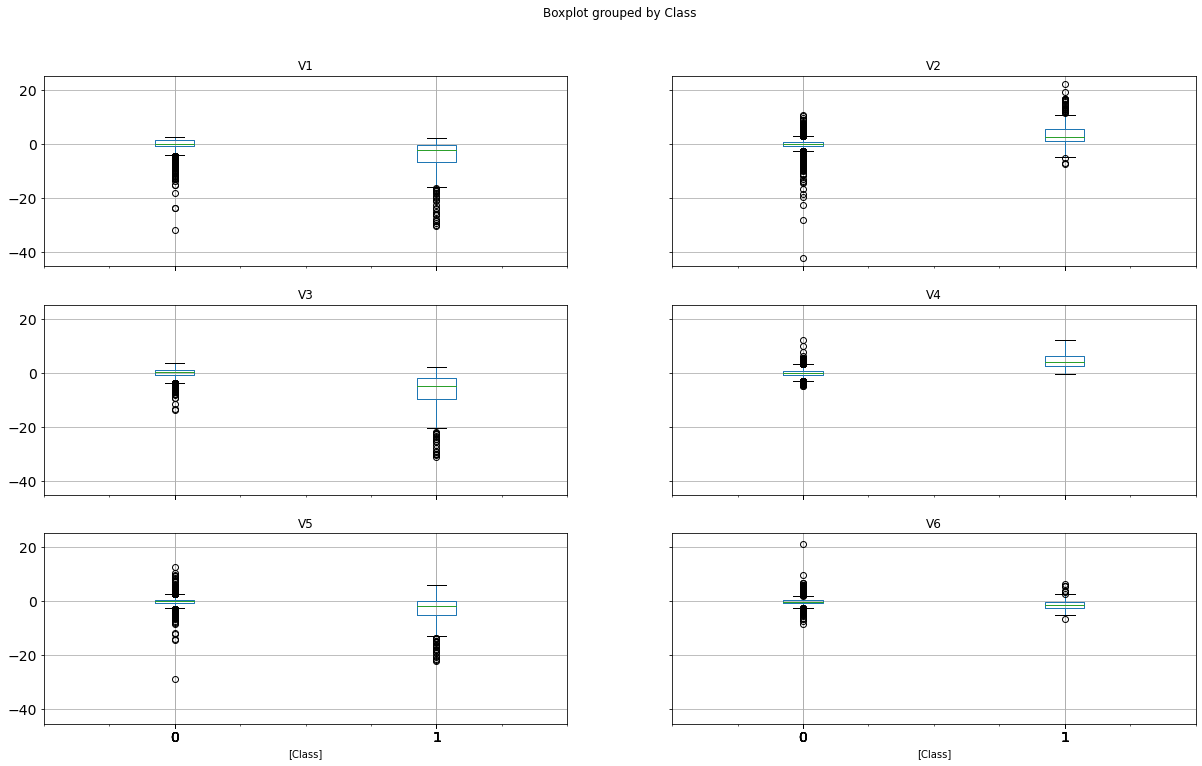

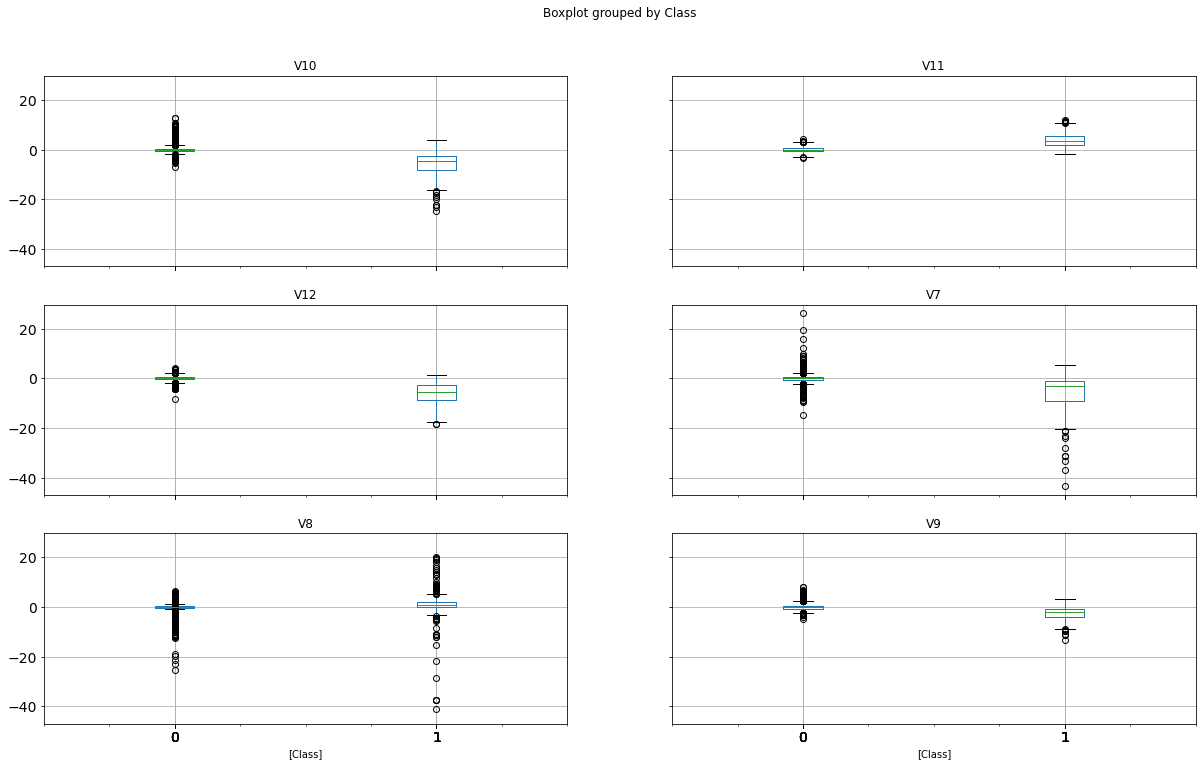

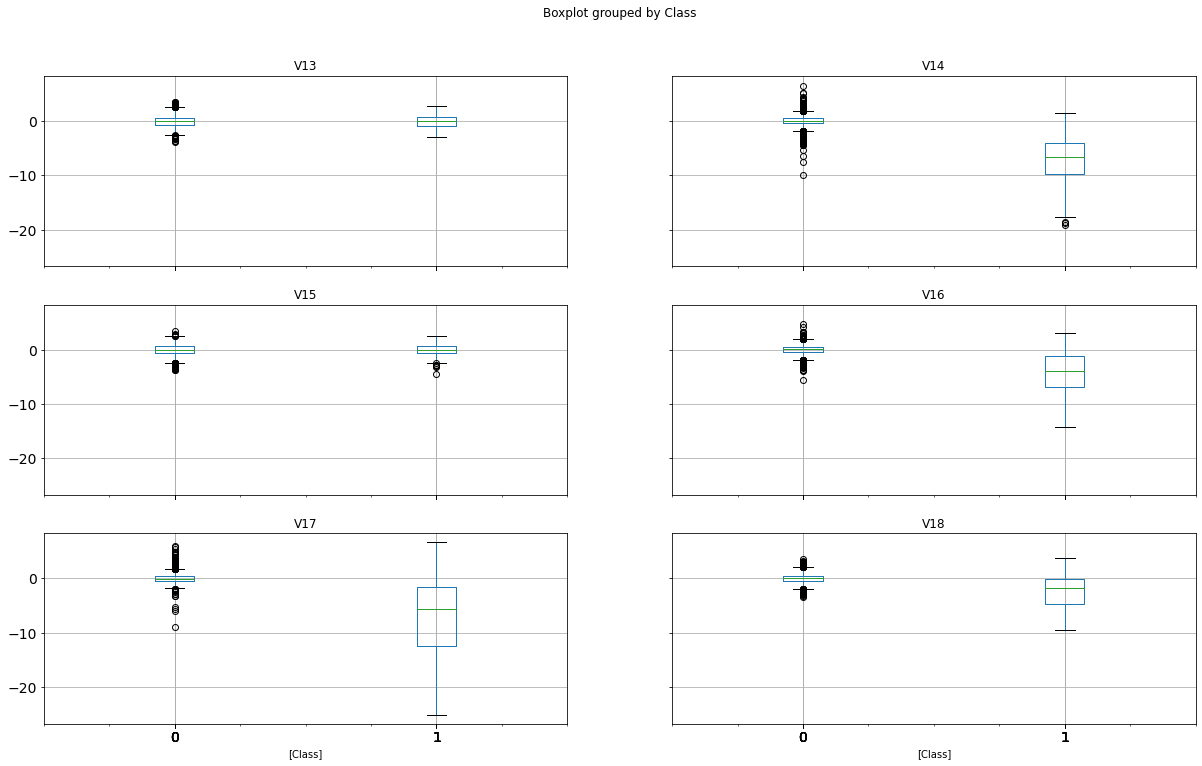

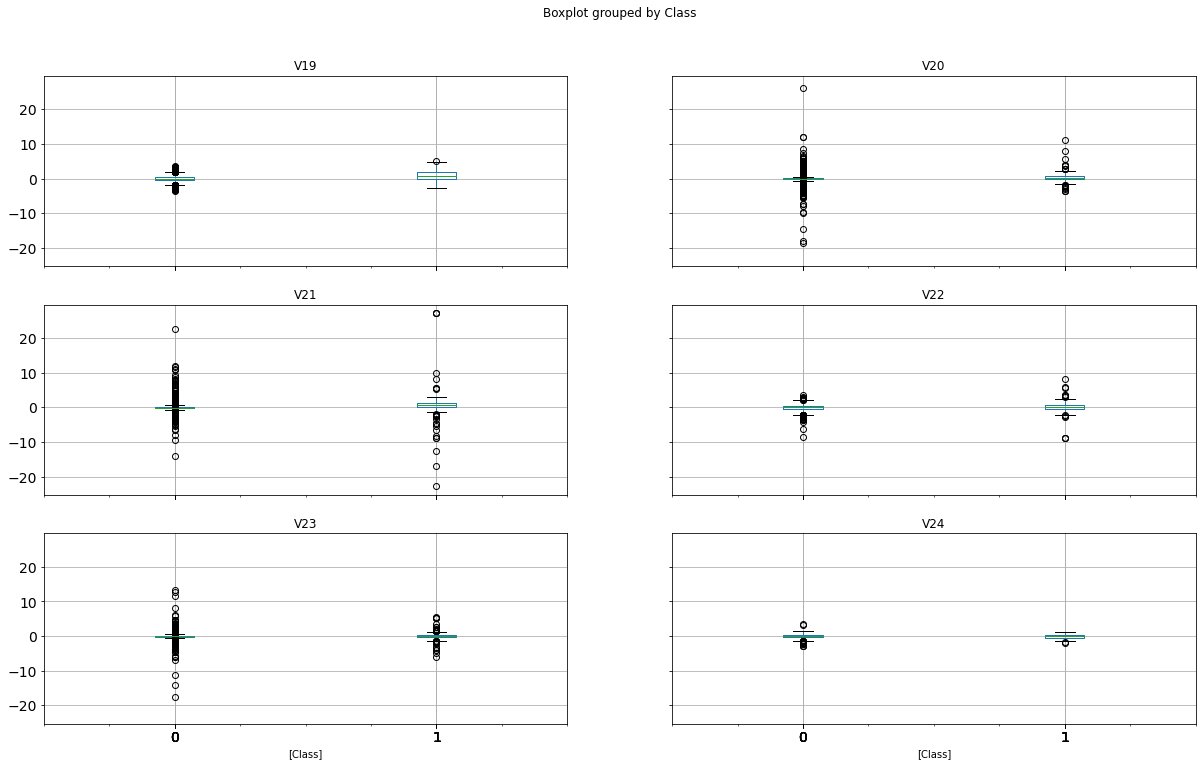

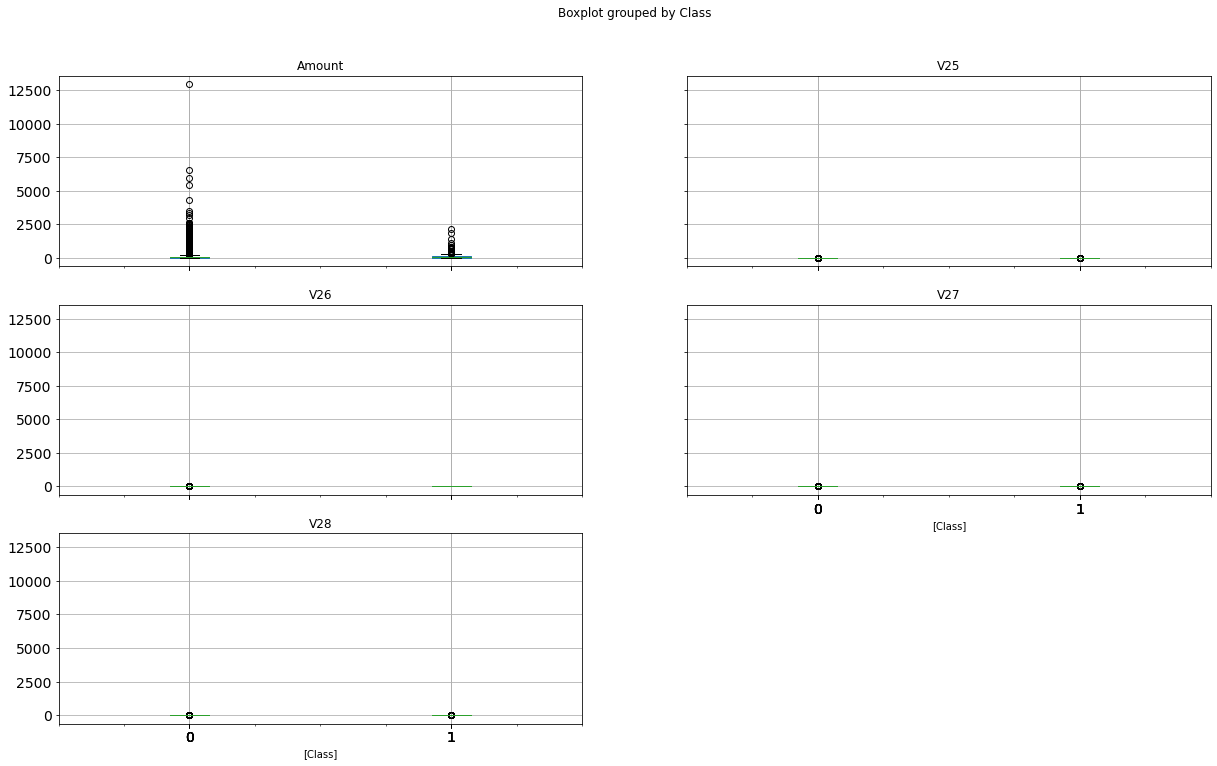

In [5]:
col_list = list(range(0,len(df.columns),6))
for i in col_list :
   if i == col_list[len(col_list)-1]:
      df.iloc[:,i:len(df.columns)].boxplot(fontsize=14, by=y_col);
   else :
      pd.concat([df.iloc[:,i:i+6], df[[y_col]]], axis=1).boxplot(fontsize=14, by=y_col);

## Diferencias Significativas

Un punto muy importante en vistas de la construcción de modelos de clasificación, es verificar que todas las variables que serán utilizadas ne el entrenamiento muestren diferencias significativas, ya sea de varianza o promedio, en relación a ambos valores de la variable dependiente.

Las siguientes tablas muestran el resultado: se eliminaron dos variables, conservando todas las demás. 

> Esto permite asegurar que cada una de las columnas seleccionadas, no sólo posee una distribución apropiada, sino que además dicha distribución aporta información relevante en relación a los valores de clasificación.

In [6]:
# Identificación de Columnas Significativas
useful_columns = []
for column in df.columns[:-1] :
   s_pvalue = shapiro(df[column])[0]
   class_0 = df[df['Class'] == 0][column]
   class_1 = df[df['Class'] == 1][column]
   t_pvalue = ttest_ind(class_0, class_1, equal_var=False)[1]
   if s_pvalue > PVALUE_CUTOFF and t_pvalue < PVALUE_CUTOFF :
      useful_columns.append(column)
   else :
      print(f'Column {column} removed with P-value of {np.round(t_pvalue,2)}')
print(f"\nSlected Columns: {useful_columns}\n")
# Selección de Columnas
df = df[useful_columns + ['Class']]

Column V13 removed with P-value of 0.53
Column V15 removed with P-value of 0.58
Column V22 removed with P-value of 0.37
Column V23 removed with P-value of 0.96
Column V25 removed with P-value of 0.95
Column V26 removed with P-value of 0.53
Column V27 removed with P-value of 0.13

Slected Columns: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V24', 'V28', 'Amount']



## Correlaciones

Las siguientes tablas muestran todas las correlaciones entre variables, la primera respecto de los actuales filtrados, la segunda en relación a todas las variables.

> Como se puede observar, los sucesivos filtrados de variables realizados permitieron descartar correlaciones no despreciables que estaban presentes entre columnas que inicialmente formaban parte del dataset. Esto permite que no sea necesario eliminar columnas por estos motivos.

In [7]:
# Lectura de Datos Originales y Cálculo de Correlación
initial_df = (
   pd.read_csv(GLOBAL_PATH, index_col=0).
   corr('spearman')
)
df_corr_stack = (
   pd.read_csv(GLOBAL_PATH, index_col=0).
   corr('spearman').
   stack().
   to_frame().
   reset_index().
   query('level_0 != level_1').
   reset_index(drop=True).
   rename(columns={0:'Correlation'}).
   assign(Variables = '')
)
for row in range(len(df_corr_stack)) :
   variables = [df_corr_stack.loc[row, 'level_0'], df_corr_stack.loc[row, 'level_1']]
   variables.sort()
   df_corr_stack.loc[row, 'Variables'] = f"{variables[0]}-{variables[1]}"
df_corr = (
   df_corr_stack[['Variables','Correlation']].
   drop_duplicates().
   sort_values('Variables').
   reset_index(drop=True)
)
# Filtrando por valores de Correlación
df_out = df_corr[
   (abs(df_corr['Correlation']) >= MAX_CORR_VAL)
].sort_values('Variables').reset_index(drop=True)
# Cálculo de Correlación datos Actuales
corr = df.iloc[:,:-1].corr('spearman')
# Tablas de Correlación con Colores
old_df = initial_df.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).set_precision(3)
filtered_df = corr.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).set_precision(3)
# Visualización de Resultados
display_html('<h2>Tabla de Correlaciones considerables</h2>', raw=True)
display(df_out)
display_html('<h2>Tabla de Correlación General</h2>', raw=True)
display(filtered_df)

Tabla de Correlaciones considerables

,Variables,Correlation
0,Amount-V2,-0.489968
1,Amount-V5,-0.319976
2,Class-V14,-0.305485
3,V1-V2,-0.400544
4,V1-V3,-0.322024
5,V2-V7,0.318498
6,V21-V22,0.638627
7,V23-V25,-0.426844
8,V27-V28,0.455985
9,V5-V7,0.455866


Tabla de Correlación General

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,V24,V28,Amount
V1,1.000,-0.401,-0.322,0.052,-0.027,-0.038,-0.146,-0.256,0.186,0.258,-0.053,0.090,0.056,0.120,0.026,0.021,-0.027,-0.208,-0.088,-0.012,-0.203,-0.096
V2,-0.401,1.000,-0.007,0.200,0.266,-0.157,0.318,0.042,-0.153,-0.249,0.068,-0.056,-0.010,0.015,-0.077,-0.046,0.024,0.081,-0.028,0.007,0.155,-0.490
V3,-0.322,-0.007,1.000,-0.031,-0.160,0.214,-0.003,0.108,0.030,0.039,-0.057,0.036,-0.032,0.033,0.057,0.015,-0.060,0.073,-0.093,0.016,0.113,0.016
V4,0.052,0.200,-0.031,1.000,-0.036,0.022,-0.029,0.030,0.009,-0.047,0.072,0.025,0.005,-0.109,-0.021,-0.043,0.028,0.018,0.099,-0.017,0.031,-0.020
V5,-0.027,0.266,-0.160,-0.036,1.000,0.027,0.456,-0.102,-0.011,-0.086,-0.052,0.027,0.084,0.070,-0.059,0.052,-0.043,0.028,-0.078,-0.026,-0.042,-0.320
V6,-0.038,-0.157,0.214,0.022,0.027,1.000,-0.227,0.369,0.076,0.120,-0.008,0.098,-0.013,0.033,0.029,0.103,0.002,0.028,-0.028,-0.122,0.018,0.204
V7,-0.146,0.318,-0.003,-0.029,0.456,-0.227,1.000,-0.406,-0.033,-0.115,-0.076,0.051,0.145,-0.014,-0.064,-0.016,-0.058,0.134,-0.070,0.005,0.010,-0.020
V8,-0.256,0.042,0.108,0.030,-0.102,0.369,-0.406,1.000,-0.057,-0.149,0.088,0.032,-0.020,0.019,0.026,0.032,0.010,0.022,0.116,-0.038,0.111,0.026
V9,0.186,-0.153,0.030,0.009,-0.011,0.076,-0.033,-0.057,1.000,-0.184,-0.107,0.167,0.037,0.047,0.008,0.041,-0.035,-0.039,-0.118,0.007,-0.123,-0.045
V10,0.258,-0.249,0.039,-0.047,-0.086,0.120,-0.115,-0.149,-0.184,1.000,-0.067,-0.059,0.108,0.028,-0.053,0.021,0.001,-0.116,-0.110,0.002,-0.157,0.044


## Balance de Clases

### Balance Original

Como último punto antes de entrar en la creación de los modelos, se debe abordar un tema central, el cual corresponde al Balance de categorías asociado a la variable objetivo de la clasificación. Así, la siguiente gráfica muestra una Visualización de barras con la Frecuencia asociada a cada uno de ambos valores.

Como se puede observar a primera vista, la diferencia es extremadamente alta, lo cual permite inferir que el desbalance afectará de forma notoriamente negativa en el entrenamiento del modelo de clasificación. 

Esto implica que, antes de continuar, se debe hacer un tratamiento de Sampling a los datos de entrenamiento y testeo. Sin embargo, aumentar la cantidad de datos en un porcentage muy elevado podría causar problemas de sobre-ajuste. 

> Por este motivo, se decide aumentar la cantidad total de casos de fraudes más o menos por 10.


In [8]:
# Definiendo función de Gráfica
def get_balance_plot(df) :
   """
   Summary :
      Plot the balance of the dataframe
   Args:
      df (pd.DataFrame): 
         Dataframe to be plotted
   Returns:
      plt.bar: 
         Bar plot of the balance of the dataframe
   """
   # Definición de Datos
   s_col = df.columns[0]
   df_g = df[[y_col,s_col]]
   df_g[y_col] = np.where(df_g[y_col] == 1, 'Fraude','Normal')
   # Cálculo de Frecuencia por Agrupamiento
   df_bar = df_g. \
      groupby(y_col). \
      count(). \
      reset_index(). \
      rename(columns = {s_col:'Count'})
   # Filtrado por Valores
   v_n = df_bar[df_bar[y_col] == 'Fraude']['Count'].reset_index(drop=True)[0]
   m_n = df_bar[df_bar[y_col] == 'Normal']['Count'].reset_index(drop=True)[0]
   # Visualización de Resultados
   print(f'Porcentage Transacciones Fraudulentas: {np.round((v_n/(v_n+m_n))*100,1)}%')
   print(f'Porcentage Transacciones Normales: {np.round((m_n/(v_n+m_n))*100,1)}%')
   plot = plt.bar(df_bar[y_col], df_bar['Count'])
   return plot

Gráfica de Valores de Categoría Originales

Porcentage Transacciones Fraudulentas: 4.1%
Porcentage Transacciones Normales: 95.9%


<BarContainer object of 2 artists>

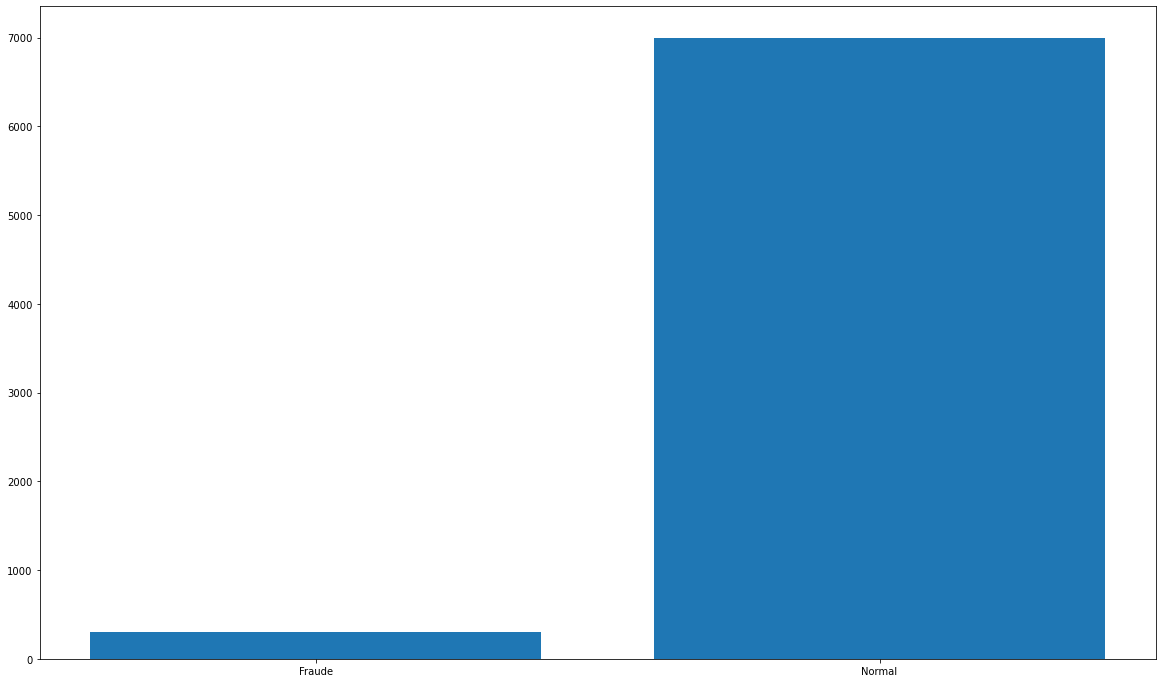

In [9]:
# Visualización de Resultados
display_html('<h2>Gráfica de Valores de Categoría Originales</h2>', raw=True)
get_balance_plot(df)

### Sampling Data

La siguiente gráfica, con la misma estructura de la anterior, muestra el nuevo balance de clases que surge de aplicar un doble método al conjunto de los datos: por un lado se hace un Under sampling de la categoría de No fraude, y por otro se realiza un Over sampling respecto de los casos de Fraude. 

> Debido a la muy baja cantidad de casos de Fraude (0.2%), y para no estirar demasiado su reproducción estadística, se genera un alance aproximado de 2%.

In [10]:
# Separando variables Independientes de la Dependiente
X, y = df.iloc[:,:-1], df.iloc[:,-1]
# Defiendo Pasos
over = SMOTE(sampling_strategy = OVER_SAMPLING_PROPORTION)
under = RandomUnderSampler(sampling_strategy = UNDER_SAMPLING_PROPORTION)
steps = [('over', over), ('under', under)]
# Ejecutando el Pipeline
pipeline = Pipeline(steps = steps)
X, y = pipeline.fit_resample(X, y)

Gráfica de Valores de Categoría Modificados

Porcentage Transacciones Fraudulentas: 23.1%
Porcentage Transacciones Normales: 76.9%


<BarContainer object of 2 artists>

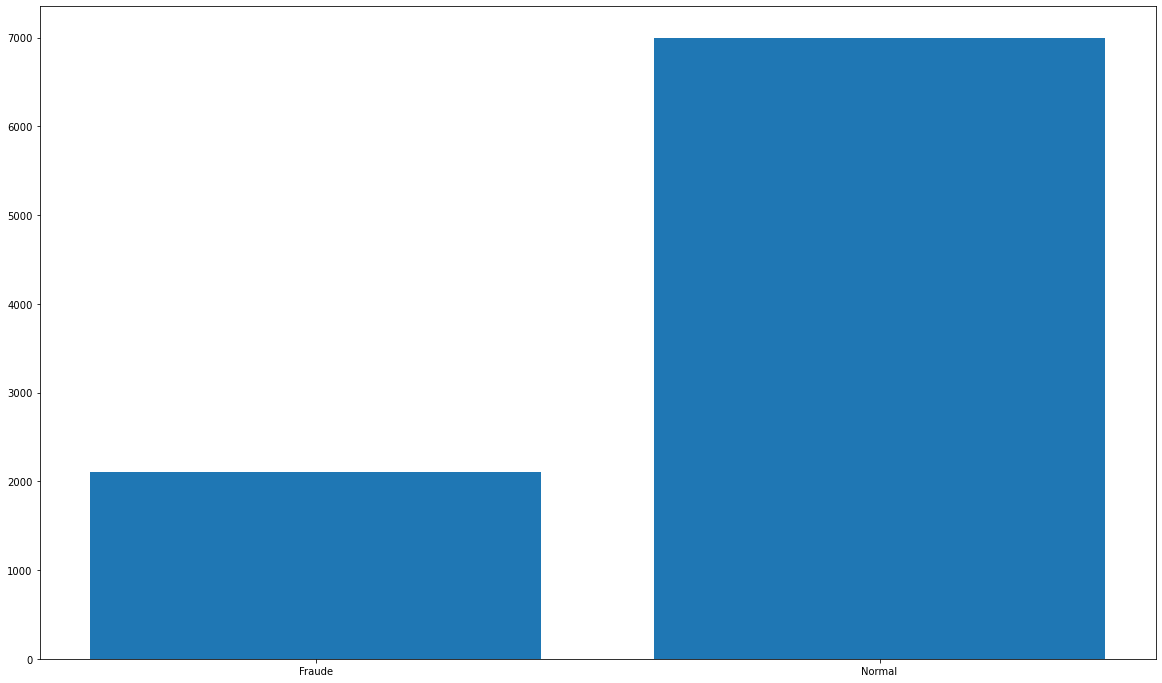

In [11]:
# Visualización de Resultados
display_html('<h2>Gráfica de Valores de Categoría Modificados</h2>', raw=True)
get_balance_plot(pd.concat([X,y], axis=1))

## Tratamiento Final

### Separación de Datos

La única forma de entrenar un testear un modelo es primero separando correctamente los datos. Así, las siguientes tablas muestran los nuevos objetos creados tomando como ratio el 20%.

In [12]:
# Separando datos de Entrenamiento y Testeo
X_train, X_test, y_train, y_test = train_test_split(
   X, y,  
   test_size = TEST_SIZE, 
   random_state = RANDOM_STATE
)
# Visualización de Resultados
display_html('<h2>Variables Independientes de Entrenamiento</h2>', raw=True)
display(X_train)
display_html('<h2>Variables Independientes de Testeo</h2>', raw=True)
display(X_test)
display_html('<h2>Variable Dependiente de Entrenamiento</h2>', raw=True)
display(y_train)
display_html('<h2>Variable Dependiente de Testeo</h2>', raw=True)
display(y_test)

Variables Independientes de Entrenamiento

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V16,V17,V18,V19,V20,V21,V24,V28,Amount
2125,-0.298326,1.143265,-0.244274,1.038916,-0.252524,-1.063715,0.917906,0.163594,-0.642722,-0.077860,...,0.931701,-0.388834,0.045826,0.022053,0.362189,0.089349,0.220165,0.369112,0.173458,89.9900
3343,-0.505883,1.078401,-0.047044,-0.252572,1.898148,0.396951,0.752909,0.247711,-0.658054,-1.161646,...,-1.266306,1.174064,0.037680,1.349644,-0.621232,-0.089423,0.027764,-1.866446,0.159413,1.0000
6345,-2.467305,-2.421027,2.004776,-2.011484,0.102353,0.494577,-0.501700,-0.287478,-1.017101,1.648545,...,-1.654666,-1.407595,0.840422,-0.802241,-0.613704,-1.159774,-0.438777,-0.248001,0.259256,42.3500
8137,-5.527228,6.632792,-11.503317,7.160287,-8.973420,-2.635076,-10.702067,4.309555,-4.394588,-12.774035,...,-13.970968,-12.887866,-20.142499,-7.265060,3.923779,0.463703,2.408601,0.502551,0.437216,322.0932
104,1.715190,-0.720657,-3.209537,-0.540834,2.388054,3.269715,-0.331528,0.793292,0.863192,-0.887920,...,-1.201348,-0.072210,1.003222,-0.072110,-0.048665,0.196021,-0.157585,0.592042,-0.001587,161.1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6302,-0.536103,0.989541,-0.493847,-1.211661,1.326465,-1.197519,1.631590,-0.455027,-0.748253,-0.390299,...,0.867743,-0.384556,-0.721734,0.209483,0.399657,-0.256535,0.280253,-0.271242,0.102953,25.6800
3027,-0.785390,0.465815,1.684160,-0.683261,0.182913,-0.344528,0.743292,-0.440077,0.916793,0.215174,...,-1.103521,-0.031897,-0.790149,-0.074994,-0.487235,0.281467,0.130867,0.078359,-0.126851,29.9900
2351,1.666786,-0.510117,-0.708216,0.920667,0.574275,1.965422,-0.634816,0.617338,0.559367,0.142145,...,0.245091,-0.255770,-0.192548,-1.009127,-1.136085,-0.137396,-0.061820,-0.800728,-0.030067,82.0000
4634,-0.100642,1.234425,0.024438,1.032598,0.744236,-0.360728,0.608881,-0.127264,-0.520564,-0.055720,...,-0.796478,-0.835594,1.467085,0.175582,2.762432,0.395922,-0.299127,0.604631,0.256360,1.7900


Variables Independientes de Testeo

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V16,V17,V18,V19,V20,V21,V24,V28,Amount
3709,-0.847246,0.284712,0.496356,0.024864,0.857900,0.645161,-0.380299,0.802547,-0.250208,-0.615514,...,0.317115,1.164778,-1.379442,1.399836,-0.275551,-0.021813,0.328244,-0.367921,-0.168619,19.000000
5286,2.186916,0.156678,-2.341134,-0.099492,0.793685,-1.434136,0.824374,-0.599565,0.197118,0.014000,...,0.702505,-0.462172,-0.522086,-0.369438,0.362951,-0.206020,0.105068,-0.585650,-0.085526,0.770000
7800,-26.449166,16.533725,-30.112314,8.934320,-17.876170,-1.157814,-31.276942,-11.674121,-9.485169,-22.201227,...,-3.924396,-6.806468,-12.467813,-5.505173,-0.577262,2.881428,-8.866589,0.252113,-1.312983,1.017381
2738,0.094963,1.048074,-0.313328,-0.634709,0.968856,-0.565596,0.937004,-0.018746,-0.438590,-0.690694,...,-0.972389,0.452796,0.116803,0.138996,0.005824,0.079312,-0.271639,0.682533,0.077273,4.560000
5467,-4.176648,-0.681814,0.602285,2.056717,3.496291,-1.629388,-3.404692,-4.088100,0.916410,0.044938,...,0.481330,-0.140829,2.827941,0.672487,1.357262,-2.787017,2.959941,0.234582,-0.333475,0.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,-0.371551,1.136981,-1.267465,-0.251476,0.640403,-1.071467,0.575564,0.201167,0.109255,-0.858746,...,-0.411509,0.410151,0.378080,1.081903,0.088968,-0.135452,0.257312,-0.800712,0.070744,24.520000
3555,-0.815296,1.751783,2.672861,4.387774,-0.345118,0.824884,-0.021388,0.459505,-2.038758,1.308462,...,0.240078,0.016549,0.452323,-0.265448,0.403609,0.131603,0.015394,0.359978,-0.181576,9.760000
6600,-1.548397,1.040170,1.659774,-0.460320,-0.786111,-0.147685,0.162723,0.125079,1.057199,0.533078,...,-0.857116,-0.564839,0.299077,-0.845547,-0.283815,0.387774,0.029910,0.497248,0.380659,29.330000
2521,1.286640,-0.126842,-1.373276,-0.608564,2.107153,3.177517,-0.401963,0.735699,-0.104359,0.010407,...,0.473193,0.467528,-0.840589,0.094713,0.198098,0.070579,-0.044207,1.049679,0.005147,28.000000


Variable Dependiente de Entrenamiento

2125    0
3343    0
6345    0
8137    1
104     0
       ..
6302    0
3027    0
2351    0
4634    0
4186    0
Name: Class, Length: 7280, dtype: int64

Variable Dependiente de Testeo

3709    0
5286    0
7800    1
2738    0
5467    0
       ..
2347    0
3555    0
6600    0
2521    0
6543    0
Name: Class, Length: 1820, dtype: int64

### Escalamiento de Valores

Con la finalidad de tener la homogeneidad requerida de valores de datos que permita usarlos de forma transversal por diferentes modelo, incluyendo red neuronal, se Escalan todos los valores de los datos independientes tanto de entrenamiento como de testeo.

In [13]:
# Definiendo y ejecutando dunción de Escalamiento de datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Visualización de Resultados
display_html('<h2>Variables Escaladas de Entrenamiento</h2>', raw=True)
display(X_train)
display_html('<h2>Variables Escaladas de Testeo</h2>', raw=True)
display(X_test)

Variables Escaladas de Entrenamiento

array([[ 0.19893417,  0.09140903,  0.29441301, ...,  0.6707602 ,
         0.38998228, -0.02905836],
       [ 0.15027704,  0.06945639,  0.33554477, ..., -3.18683157,
         0.3531215 , -0.33351597],
       [-0.30953301, -1.11489647,  0.76344744, ..., -0.39410575,
         0.61516263, -0.19204701],
       ...,
       [ 0.65960948, -0.46816465,  0.19765893, ..., -1.34786939,
        -0.14417646, -0.0563942 ],
       [ 0.24527665,  0.12226166,  0.35045232, ...,  1.07716338,
         0.60756267, -0.33081317],
       [ 0.69442886, -0.52985876, -0.01974949, ..., -0.08423341,
        -0.13005125,  0.27888893]])

Variables Escaladas de Testeo

array([[ 0.07025254, -0.19916128,  0.44886979, ..., -0.60103541,
        -0.50781037, -0.27193335],
       [ 0.78154184, -0.24249327, -0.14288259, ..., -0.97673911,
        -0.28973074, -0.33430286],
       [-5.93152848,  5.30018532, -5.93450209, ...,  0.46887124,
        -3.51123385, -0.3334565 ],
       ...,
       [-0.0941162 ,  0.05651739,  0.69149809, ...,  0.89186636,
         0.93379116, -0.23659177],
       [ 0.57049303, -0.33844831,  0.05896208, ...,  1.84512085,
        -0.05175359, -0.24114204],
       [ 0.22044869,  0.09570757, -0.01543491, ...,  1.81275166,
         0.84374797,  0.07381882]])

### Reducción de Dimensionalidad

Finalmente, antes de pasar a la creación de modelos, se realiza una reducción de dimensionalidad. El motivo de la aplicación de este método es doble: por un lado reducir la cantidad total de variables a considerar, pero por otro es lograr la creación de columnas nuevas con máxima interpedendencia y con nu;a relación entre ellos. Esto dificultará poder explorar la importancia de variables en algunos modelos, sin embargo permite mayor efectividad en su entrenamiento.

La siguiente gráfica muestra la curva de valores de Varianza explicada  Acumulada en relación a la cantidad de componentes considerados. Para este caso, consideraremos que un 90% es adecuado para perder lo mínimo posible de valor en los datos.

Text(0, 0.5, 'Cumulative explained variance')

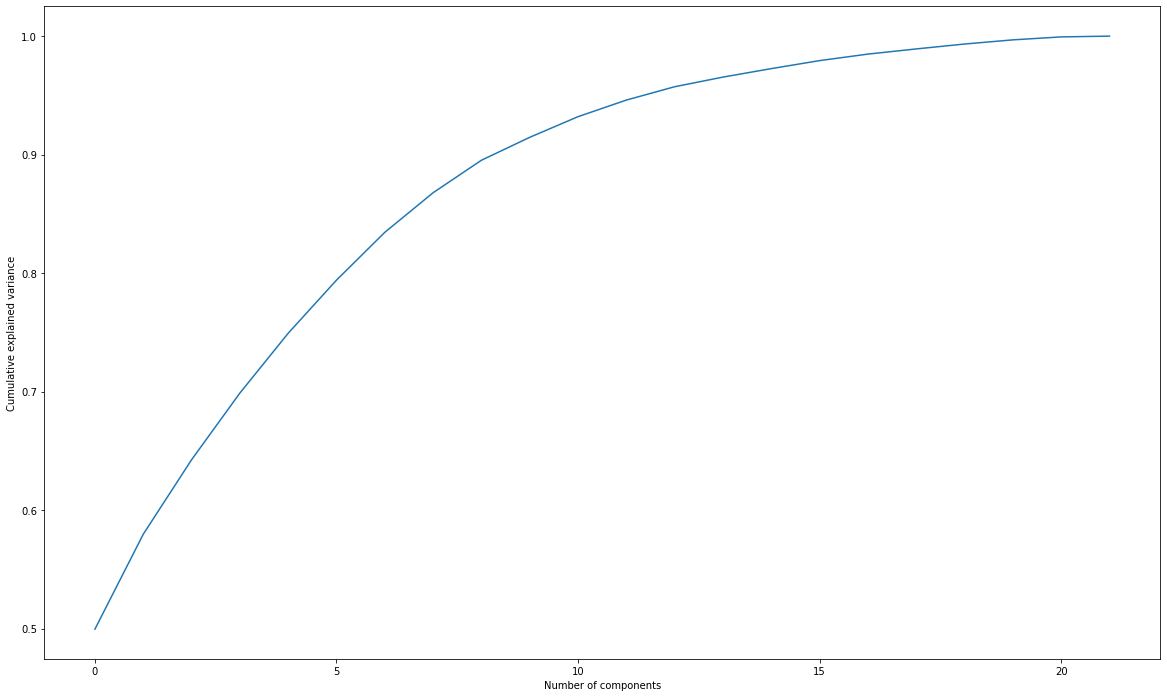

In [14]:
# Definiendo, ejecutando y Visualizando Función de Principal Component Analysis
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Como muestra el siguiente recuadro, se seleccionaron 5 componentes, y se contruyeron nuevas matrices de Array con el fin de dejar los datos listos para el entrenamiento de los modelos.

In [15]:
# Definiendo cantidad óptima de Componentes
num = 1
while num <= X_train.shape[1] :
   pca = PCA(n_components = num)
   X_train_loop = pca.fit_transform(X_train)
   X_test_loop = pca.transform(X_test)
   explained_variance = pca.explained_variance_ratio_
   accurracy = explained_variance.sum()
   if accurracy > MIN_ACCURRACY :
      print(f"Number of Components Selected: {num}\n")
      break
   else :
      num += 1
# Definiendo y ejecutando Función de Principal Component Analysis
# utilizando la cantidad de componentes óptima
pca = PCA(n_components = num)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Number of Components Selected: 13



# Entrenamiento de Modelos

Lo primero, es definir funciones que, en su conjunto, nos permitirán evaluar rápidamente, al término del entrenamiento de cada modelo, el desempeño que este tuvo en términos de clasificación.

In [16]:
# Definiendo Función de cálculo Validación Cruzada
def cross_mal_model(model):
   """
   Summary :
      Caulculating Models' Cross Validation Score
    Args:
      model (sklearn.model): 
         Model to be evaluated
   """
   return print(
      cross_val_score(
         model, X_train, y_train, 
         cv = CROSS_VALIDATION_NUM
      )
   )
   
# Definiendo Función de cálculo de Métricas
def get_report(model):
   """
   Summary :
      Caulculating Classification Report
   Args:
      model (sklearn.model): 
         Model to be evaluated
   """
   # Cálculo de Predición
   prediction = model.predict(X = X_test)
   # Visualización de Resultados
   return print(
      classification_report(
         y_true = y_test,
         y_pred = prediction
      )
   )
   
# Definiendo Función de cálculo de Matriz de Confusión
def get_cm(model):
   """
   Summary :
      Caulculating Confusion Matrix
   Args:
      model (sklearn.model): 
         Model to be evaluated
   """
   # Cálculo de Predición y de Matriz de Confusión
   prediction = model.predict(X = X_test)
   cf_matrix = confusion_matrix(
      y_true = y_test,
      y_pred = prediction
   )
   # Creación de Etiquetas
   group_names = ['True Neg','False Pos','False Neg','True Pos']
   group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
   group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
   labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
   labels = np.asarray(labels).reshape(2,2)
   # Visualización de Resultados
   sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
   
# Definiendo Función General de Scoring
def get_model_validation(model) :
   """
   Summary :
      Visualizing Predictions'results of a model
   Args:
      model (sklearn.model): 
         Model to be evaluated
   """
   display_html('<h2>Accurary Iterativo</h2>', raw=True)
   cross_mal_model(model)
   display_html('<h2>Reporte General</h2>', raw=True)
   get_report(model)
   display_html('<h2>Matriz de Confusión</h2>', raw=True)
   get_cm(model)

## Árbol de Decisión

La siguiente gráfica muestra el resultado de entrenar un modelo de Árbol de Decisión con una profundidad de 5 niveles y criterio de Entropía.

> Como se puede observar, el componente 1 es el que ocupa la mayor importancia. Luego, los demás componentes parecen ocuparse de forma variada.

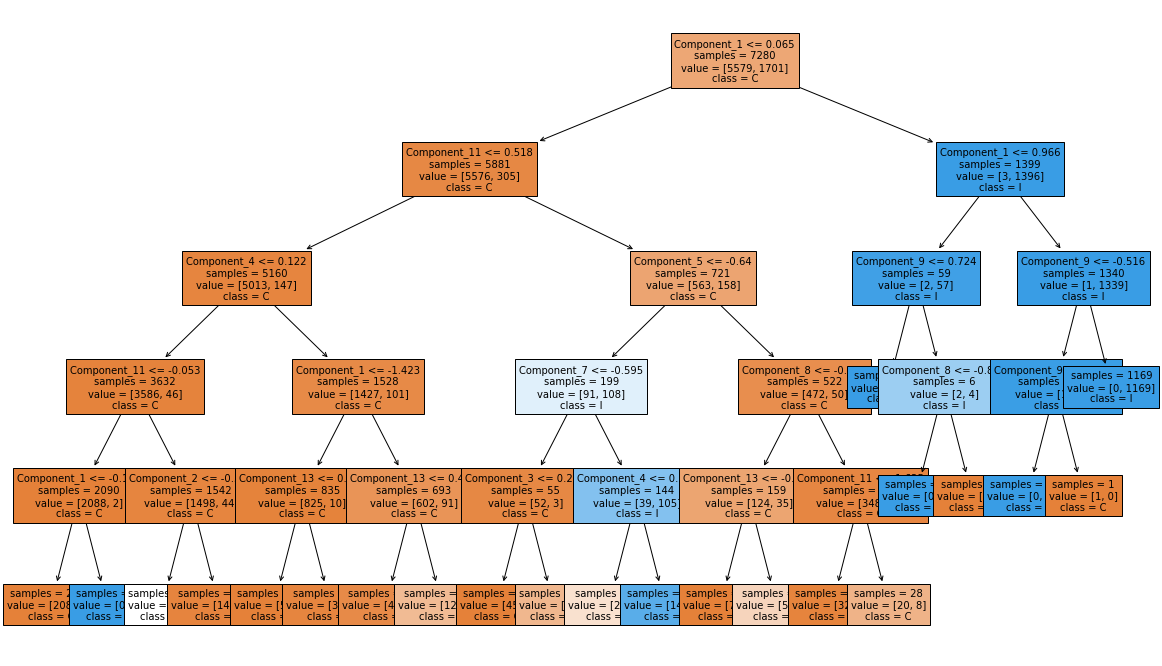

In [17]:
# Definiendo y entrenando Modelo de Clasificación de Árbol de Decisión
tree_model = DecisionTreeClassifier(
  max_depth = 5,
  criterion = 'entropy',
  random_state = RANDOM_STATE
)
tree_model.fit(X_train, y_train)
# Visualización de Resultados
columns = [f'Component_{num}' for num in range(1,pca.n_components_+1)]
plot = plot_tree(
  decision_tree = tree_model,
  feature_names = columns,
  class_names = y_col,
  filled = True,
  impurity = False,
  fontsize = 10
)

La gráfica muestra el resultado final de la Matriz de Confusión, en la cual podemos ver que la parte más débil de la predicción consiste en los Falos-Negativos.

> Esto es algo que uno ya esperaba: la mayor dificultad está en clasificar correctamente la categoría de Fraude. Por ello vemos tanto Precision como Recall con valores más bajos.

Veamos si podemos mejorar estos números con los siguientesd modelos.

Accurary Iterativo

[0.96497734 0.96621343 0.96207749]


Reporte General

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1421
           1       0.98      0.86      0.92       399

    accuracy                           0.97      1820
   macro avg       0.97      0.93      0.95      1820
weighted avg       0.97      0.97      0.97      1820



Matriz de Confusión

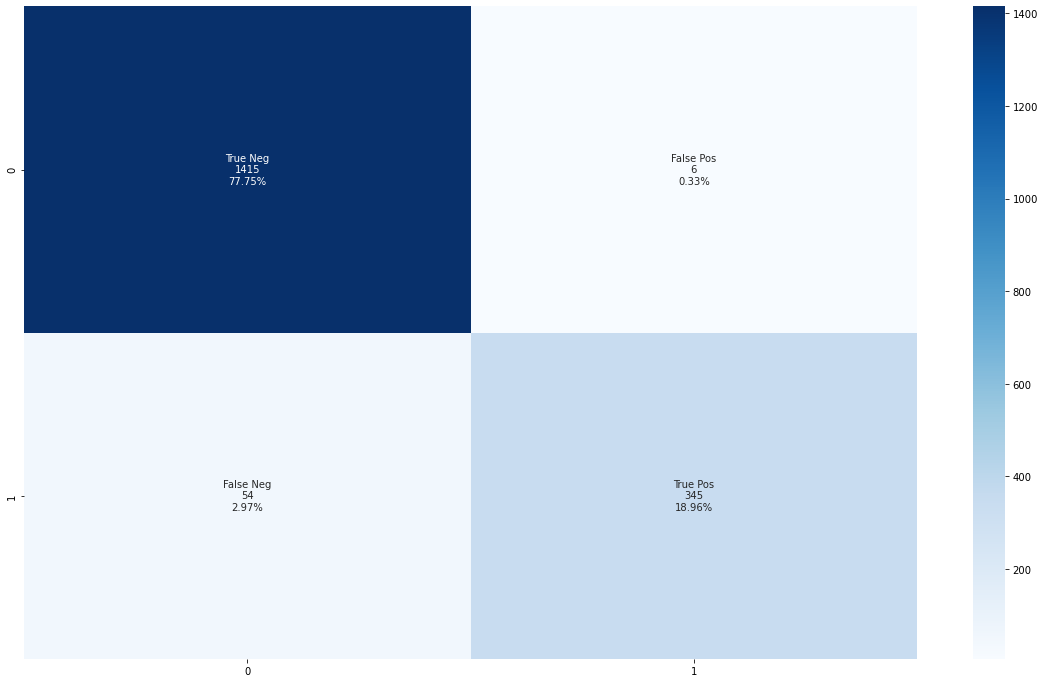

In [18]:
# Visualización de Resultados
get_model_validation(tree_model)

## Regresión Logística

El siguiente recuadro muestra el resumen de los parámetros que componen el Modelo entrenado de Regresión Logística.

In [19]:
# Definiendo y entrenando Modelo de Clasificación de Regresión Logística
log_model = LogisticRegression(
   solver = 'lbfgs',
   penalty = 'l2',
   C = 10,
   random_state = RANDOM_STATE
)
log_model.fit(X_train, y_train)

LogisticRegression(C=10, random_state=123456)

La gráfica muestra el resultado final de la Matriz de Confusión, en la cual podemos ver que, nuevamente, la parte más débil de la predicción consiste en los Falos-Negativos.

> En este caso, mejoramos el Precision pero a costa del Recall, por lo que el modelo muestra el mejor comportamiento esperado.

Accurary Iterativo

[0.9658014  0.96456531 0.96867271]


Reporte General

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1421
           1       0.97      0.89      0.93       399

    accuracy                           0.97      1820
   macro avg       0.97      0.94      0.96      1820
weighted avg       0.97      0.97      0.97      1820



Matriz de Confusión

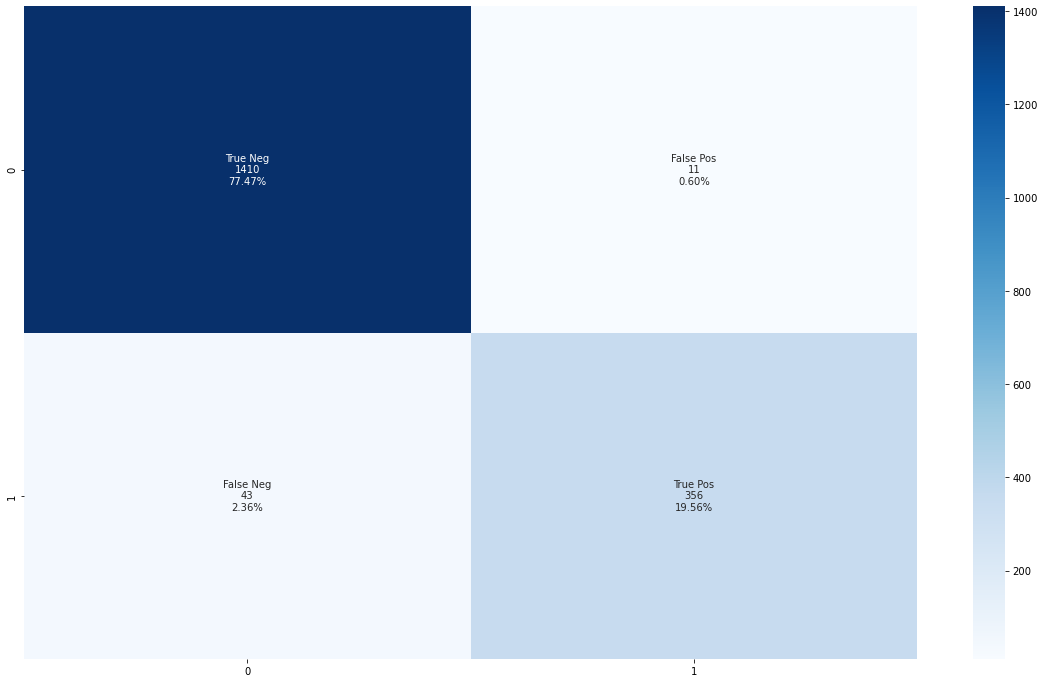

In [20]:
# Visualización de Resultados
get_model_validation(log_model)

## Random Forest

La siguiente tabla muestra el resultado de predicción de múltiples modelos de Random Forest entrenados mediante una grilla.

In [21]:
# Definiendo calores de Grilla
param_grid = ParameterGrid({
   'n_estimators': [100,180],
   'max_features': [1,5,12],
   'max_depth'   : [10,30],
   'criterion'   : ['entropy','gini']
})
results = {'params': [], 'oob_accuracy': []}
# Loop de entrenamiento iterativo de Modelos según Grilla
model_list =[]
for params in param_grid:
   # Entrenamiento del Modelo
   grid_model = RandomForestClassifier(
      oob_score = True,
      random_state = RANDOM_STATE,
      ** params
   )
   grid_model.fit(X_train, y_train)
   # Guardando Resultados
   results['params'].append(params)
   results['oob_accuracy'].append(grid_model.oob_score_)
   model_list.append(grid_model)
# Definiendo objeto de Resultados
results = pd.DataFrame(results)
df_results = pd.concat([results, results['params'].apply(pd.Series)], axis=1). \
   sort_values('oob_accuracy', ascending=False). \
   reset_index(drop=True). \
   drop(columns = 'params')
# Visualización de Resultados
display_html('<h2>Resultados Combinaciones Hiperparámetros</h2>', raw=True)
display(df_results)

Resultados Combinaciones Hiperparámetros

,oob_accuracy,criterion,max_depth,max_features,n_estimators
0,0.985027,entropy,30,5,180
1,0.984478,entropy,30,5,100
2,0.984066,entropy,30,12,100
3,0.984066,entropy,30,12,180
4,0.983242,gini,30,5,180
5,0.983242,gini,30,12,100
6,0.982967,gini,30,12,180
7,0.982830,entropy,10,12,180
8,0.982555,gini,30,5,100
9,0.982555,entropy,10,12,100


El siguiente recuadro muestra el resumen de los parámetros que componen el Modelo entrenado de Random Forest que tuvo el mejor desempeño según lo mostrado anteriormente.

In [22]:
# Selección del mejor Modelo calculado
index_selected = df_results.index[0]
rf_model = model_list[index_selected]
rf_model

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=1,
                       oob_score=True, random_state=123456)

Podemos observar que mediante Random Forest se logró mejorar bastante los valores de Precision y Recall asociado a la categoría de Fraude. 

> Esto es positivo especialemtne considerando que ya casi ambos están sobre el 90%.

Accurary Iterativo

[0.97280593 0.97074578 0.9657873 ]


Reporte General

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1421
           1       0.99      0.88      0.94       399

    accuracy                           0.97      1820
   macro avg       0.98      0.94      0.96      1820
weighted avg       0.97      0.97      0.97      1820



Matriz de Confusión

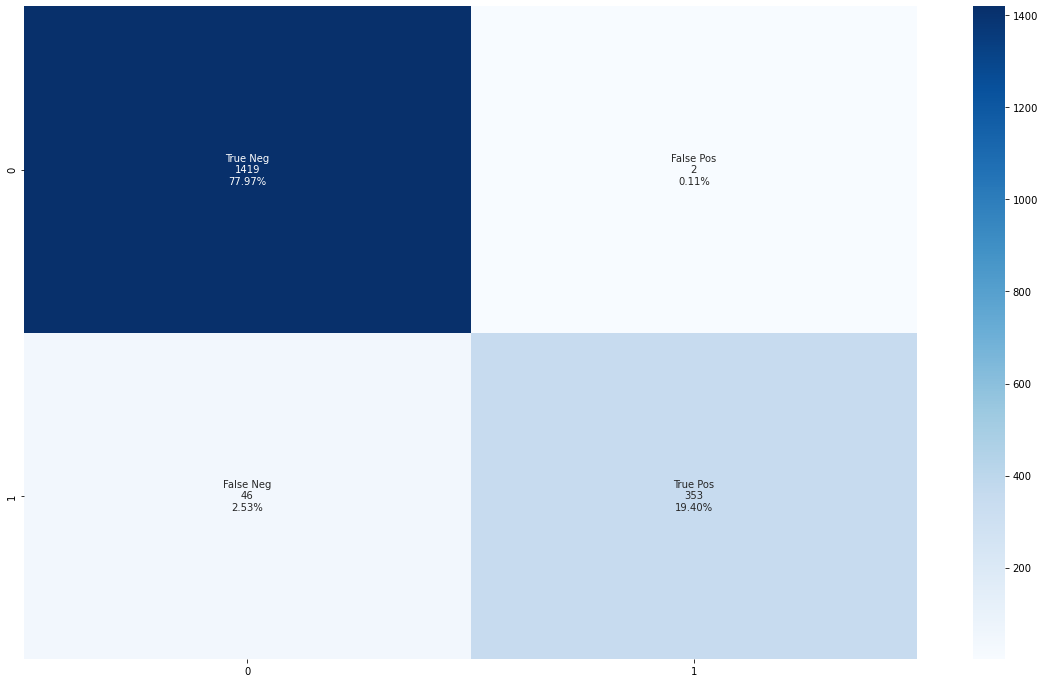

In [23]:
# Visualización de Resultados
get_model_validation(rf_model)

## Red Neuronal

In [24]:
# Definiendo Función de Gráfica para Entrenamiento de Red Neuronal
def get_best_score(grid, variable: str) -> float:
   """
   Summary :
      Plotting Model Score Values
   Args:
      grid (sklearn.model_selection.GridSearchCV): 
         Grid object received from GridSearchCV function
      variable (str):
         Variable to be evaluated
   """
   fig, ax = plt.subplots()
   scores = pd.DataFrame(grid.cv_results_)
   scores.plot(x=variable, y='mean_train_score', yerr='std_train_score', ax=ax)
   scores.plot(x=variable, y='mean_test_score', yerr='std_test_score', ax=ax)
   ax.set_ylabel('Accuracy')
   ax.set_xlabel('Número de neuronas')
   ax.set_title('Error de validacion cruzada')
   return(
      scores.
      sort_values('mean_test_score', ascending=False).
      reset_index(drop=True).
      loc[0,variable]
   )

La siguiente gráficsa muestra las variaciones de la capacidad predictiva en ambos tipos de dataset, en función de la cantidad de capas ocults utilizadas por el modelo.

> Como se puede observar, a mayor cantidad de capas ocultas, mayor tiende a ser la capacidad predictiva.

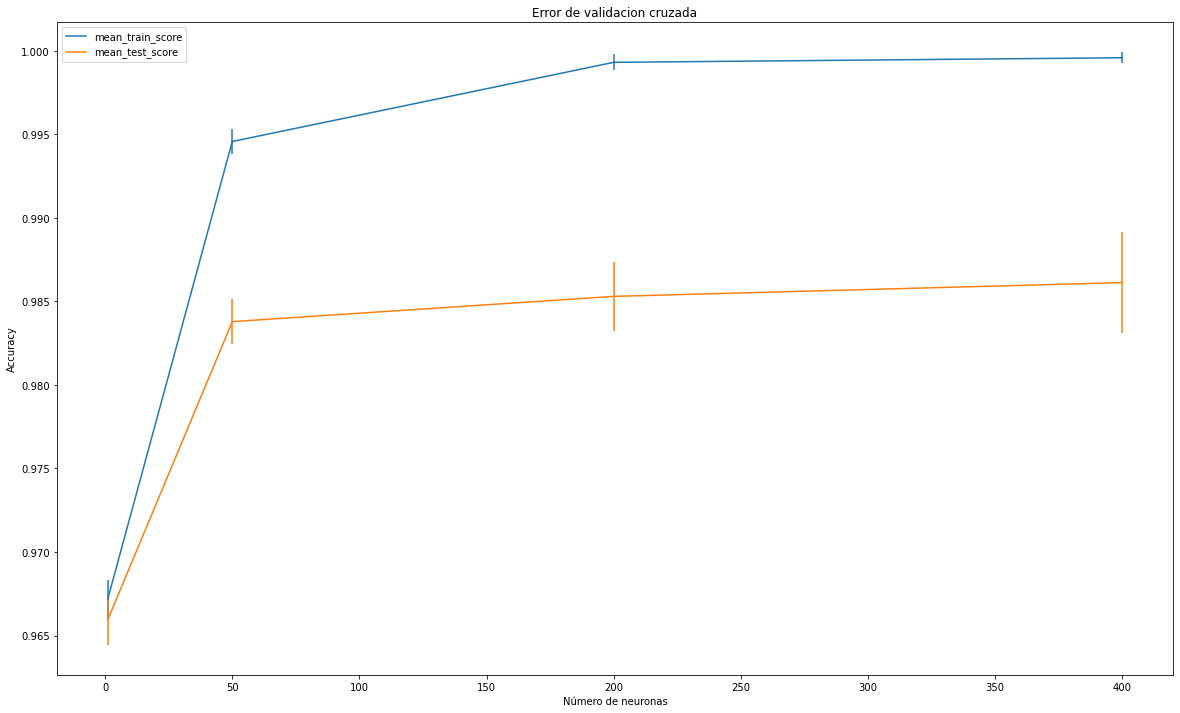

In [25]:
# Parámetros de Grilla
param_grid = {
   'hidden_layer_sizes': [1, 50, 200, 400]
}
# Definiendo y entrenando Modelo de Clasificación de Red Neuronal por Grilla
grid = GridSearchCV(
    estimator = MLPClassifier(
        learning_rate_init = 0.001,
        solver = 'adam',
        alpha = 0.001,
        max_iter = MAX_ITERATIONS,
        random_state = RANDOM_STATE
    ),
    param_grid = param_grid,
    scoring = 'accuracy',
    cv = CROSS_VALIDATION_NUM,
    refit = True,
    return_train_score = True
)
_ = grid.fit(X_train, y_train)
# Visualización de Resultados
selected_hidden_layers = get_best_score(grid, 'param_hidden_layer_sizes')

La siguiente gráficsa muestra las variaciones de la capacidad predictiva en ambos tipos de dataset, en función del valor del Learning Rate.

> Como se puede observar, el comportamiento no posee una tendencia única, destacando sólo un punto como aquel donde el modelo logra la mejor predicción posible.

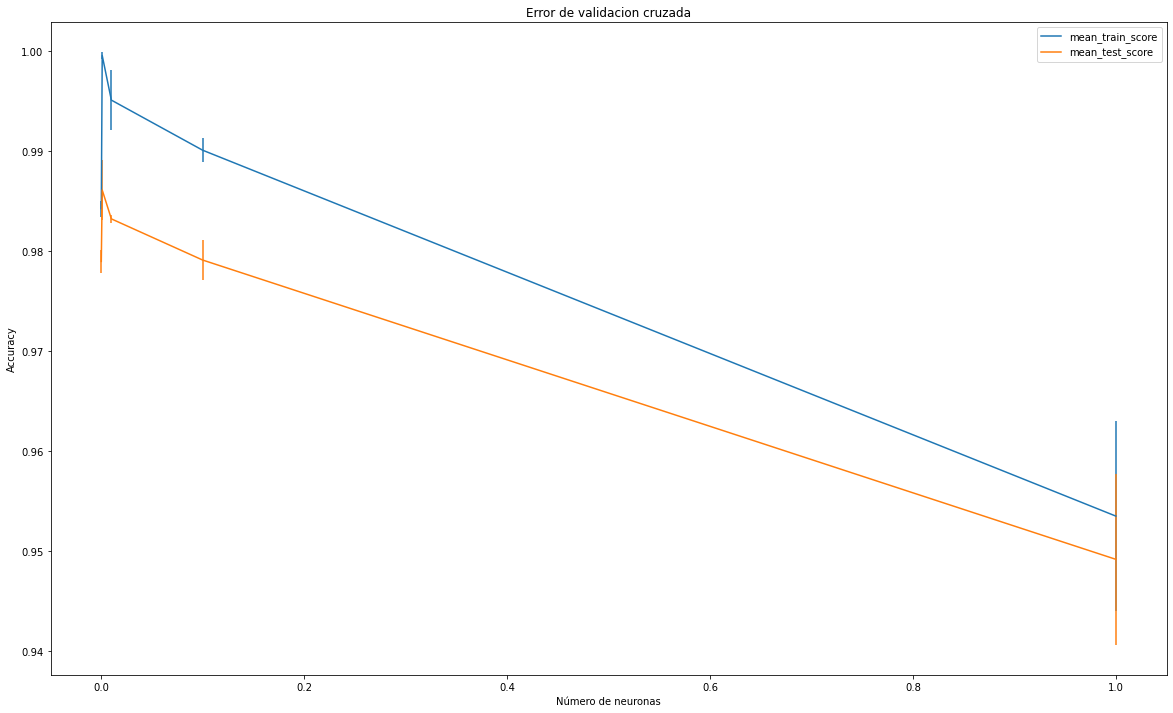

In [26]:
# Parámetros de Grilla
param_grid = {
   'learning_rate_init':[0.0001, 0.001, 0.01, 0.1, 1]
}
# Definiendo y entrenando Modelo de Clasificación de Red Neuronal por Grilla
grid = GridSearchCV(
    estimator = MLPClassifier(
        hidden_layer_sizes=(400),
        solver = 'adam',
        alpha = 0.001,
        max_iter = MAX_ITERATIONS,
        random_state = RANDOM_STATE
    ),
    param_grid = param_grid,
    scoring = 'accuracy',
    cv = CROSS_VALIDATION_NUM,
    refit = True,
    return_train_score = True
)
_ = grid.fit(X_train, y_train)
# Visualización de Resultados
selected_learning_rate = get_best_score(grid, 'param_learning_rate_init')

La siguiente tabla muestra los resultados de acuerdo a múltiples modelos calculados según variación de parámetro Alpha. Dichas combinaciones son aleatorias. Como ya se aclaró anteriormente, no se prueban más opciones sólo por temas de tiempo.

> Como se puede observar, se logra el mejor desempeño usando un valor de 0.001.

In [27]:
# Parámetros de Grilla
param_grid = {
    'hidden_layer_sizes': [1, 50, 100, 200, 400],
    'learning_rate_init':[0.0001, 0.001, 0.01, 0.1, 1],
    'alpha': np.logspace(-3, 3, 5)
}
# Definiendo y entrenando Modelo de Clasificación de Red Neuronal por Grilla
grid = GridSearchCV(
    estimator  = MLPClassifier(
        solver = 'adam', 
        max_iter= MAX_ITERATIONS,
        random_state = RANDOM_STATE
    ),
    param_grid = param_grid,
    scoring = 'accuracy',
    cv = CROSS_VALIDATION_NUM,
    return_train_score = True
)
grid.fit(X_train, y_train)
# Visualización de Resultados
df_results = pd.DataFrame(grid.cv_results_). \
    filter(regex = '(param.*|mean_t|std_t)'). \
    drop(columns = 'params'). \
    sort_values('mean_test_score', ascending = False). \
    reset_index(drop = True). \
    head(10)
df_results

,param_alpha,param_hidden_layer_sizes,param_learning_rate_init,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.001,400,0.001,0.986126,0.003034,0.999588,0.000336
1,0.001,200,0.001,0.985302,0.002056,0.999313,0.000486
2,0.001,100,0.001,0.984752,0.002357,0.998008,0.000680
3,0.001,200,0.01,0.984478,0.002616,0.996704,0.002545
4,0.001,50,0.001,0.983791,0.001360,0.994574,0.000777
5,0.031623,400,0.001,0.983379,0.000512,0.991690,0.001950
6,0.031623,100,0.01,0.983242,0.001852,0.992514,0.001854
7,0.001,400,0.01,0.983242,0.000387,0.995124,0.003021
8,0.031623,200,0.001,0.983104,0.001781,0.992308,0.000351
9,0.001,50,0.01,0.982418,0.004784,0.995604,0.001950


La siguiente tabla muestra el modelo final seleccionado de Red Neuronal de acuerdo a todos los parámetros anteriormente seleccionados.

In [28]:
# Seleccionando Mejor Modelo
nn_model = grid.best_estimator_
nn_model

MLPClassifier(alpha=0.001, hidden_layer_sizes=400, max_iter=5000,
              random_state=123456)

Podemos observar que, si bien mejora los resultados respecto de los dos primeros modelos, no se logró superar al modelo Renadom Forest, ya que tanto Precision como Recall del valor de Fraude son más bajos.

> Esto quiere decir que para la predicción final se usará el modelo Random Forest.

Accurary Iterativo

[0.98969922 0.98228265 0.98639736]


Reporte General

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1421
           1       0.98      0.99      0.99       399

    accuracy                           0.99      1820
   macro avg       0.99      0.99      0.99      1820
weighted avg       0.99      0.99      0.99      1820



Matriz de Confusión

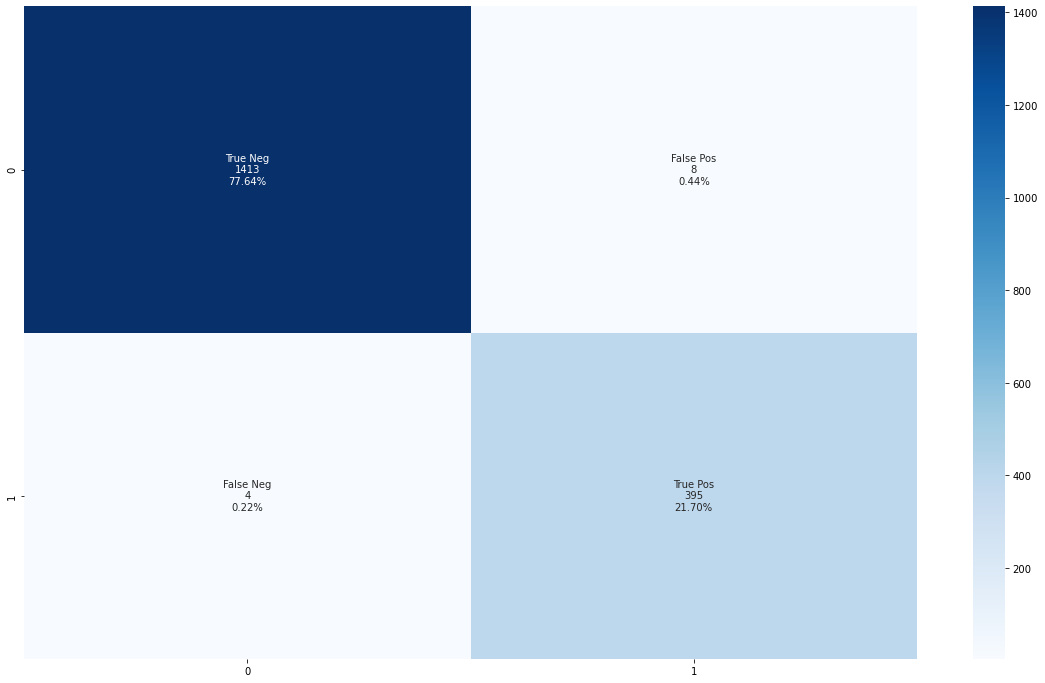

In [29]:
# Visualización de Resultados
get_model_validation(nn_model)

## Conclusiones